# **RDL - CCDR analytics interface**

## Custom hazard exposure and risk analytics

<p>This tool allows analysis with any hazard raster data of your choice. Load your own hazard data and analyze its impact on population, built-up and agricultural areas.</p>
<p>You can either use default damage functions or define custom vulnerability equations to model the relationship between hazard intensity and impact.</p>
<p>The tool supports both administrative boundaries from the World Bank Global Administrative Divisions or custom boundary files.</p>

### Cell > Run all  or   CTRL + Enter

In [1]:
%matplotlib inline
from gui_custom_hazard_utils import initialize_tool
initialize_tool()

### Using Custom Hazard Data

#### Requirements for Hazard Raster
- The hazard raster should be a GeoTIFF file (`.tif`) in EPSG:4326 projection
- Values should represent hazard intensity in the appropriate units for your analysis
- The raster should cover at least your area of interest (selected country or custom boundaries)
- Recommended to use a raster with consistent resolution (e.g., 90m or 1km)

#### Customizing Vulnerability Functions
When selecting the "Custom function" option, you can define your own damage or impact function as a mathematical expression. For example:
- Linear relationship: `Y = 0.05 * X` (5% damage per unit of hazard)
- Exponential relationship: `Y = 1 - exp(-0.1 * X)` (damage increases exponentially with hazard)
- Threshold-based: `Y = 0 if X < 10 else 0.5 * (X - 10) / 90` (no damage below threshold of 10, then linear increase)

The function should map hazard values (X) to impact factors (Y) between 0 and 1.

#### Output Products
- Excel file with tabular results by administrative area
- GeoPackage file with spatial results for use in GIS software
- Optional visualization of exposure-hazard relationships
- Expected Annual Impact calculations if multiple return periods are provided

In [6]:
from localtileserver import TileClient, get_leaflet_tile_layer, examples
from ipyleaflet import Map

# Create a TileClient from a raster file
# client = TileClient('path/to/geo.tif')
client = examples.get_san_francisco()  # use example data

# Create ipyleaflet TileLayer from that server
t = get_leaflet_tile_layer(client)
# Create ipyleaflet map, add tile layer, and display
m = Map(center=client.center(), zoom=client.default_zoom)
m.add(t)
m

Map(center=[37.752214941926994, -122.41877581711466], controls=(ZoomControl(options=['position', 'zoom_in_text…

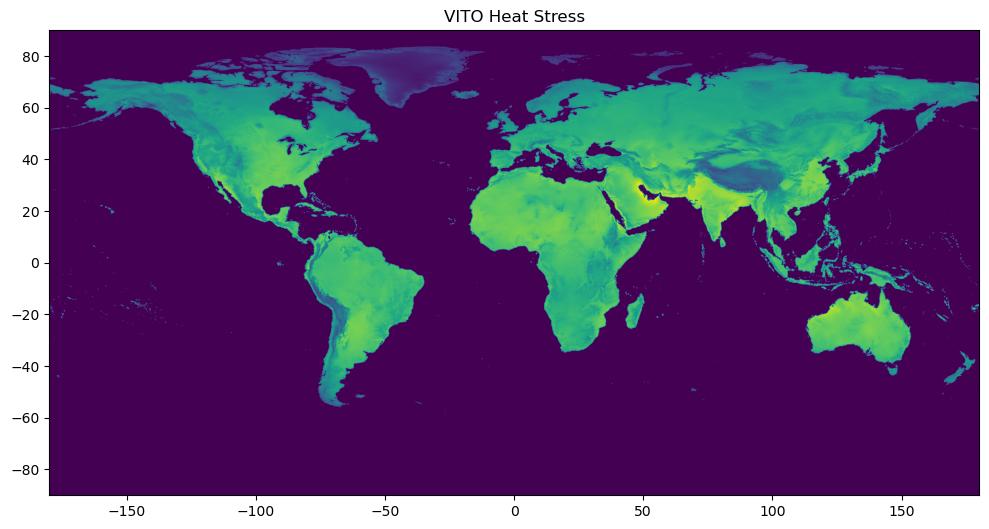

In [7]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show

# Open the file
file_path = "X:/Work/Geodata/HZD/Heat_stress/VITO-EH-20y.tif"
with rasterio.open(file_path) as src:
    # Plot with proper CRS handling
    fig, ax = plt.subplots(figsize=(12, 10))
    show(src, ax=ax)
    plt.title("VITO Heat Stress")
    plt.show()

In [37]:
import rasterio
import numpy as np
from localtileserver import TileClient, get_leaflet_tile_layer
from ipyleaflet import Map

# Path to your raster file
raster_path = "X:/Work/Geodata/CCDR/GEO/Global gridded hazard data/earthquake_pga_3arcmin.tif"

# Step 1: Open the raster and compute 5th–95th percentiles
with rasterio.open(raster_path) as src:
    band = src.read(1, masked=True)
    vmin, vmax = np.percentile(band.compressed(), [5, 95])
    print(f"Stretched value range: vmin={vmin}, vmax={vmax}")

# Step 2: Create tile client
client = TileClient(raster_path)

# Step 4: Create tile layer with percentile-based stretch and colormap
tile_layer = get_leaflet_tile_layer(
    client,
    indexes=1,        # Specify the band index
    cmap='plasma',
    vmin=vmin,
    vmax=vmax,
    opacity=0.8
)

# Step 5: Create and display the map
m = Map(center=client.center(), zoom=client.default_zoom)
m.add(tile_layer)
m


Stretched value range: vmin=0.0, vmax=0.31821027398109436


Map(center=[14.994999999999493, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…